<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
path = "../data/Wholesale customers data.csv"
df = pd.read_csv(path)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
df.describe() # Show summary statistics

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
df.info() # Show data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.isnull().sum() # Check for missing values

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
# Remove outliers using the IQR method for each numerical column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original shape: {df.shape}")
print(f"Shape after outlier removal: {df_clean.shape}")

df = df_clean  # Update df to the cleaned version
df.head()

Original shape: (440, 8)
Shape after outlier removal: (332, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545


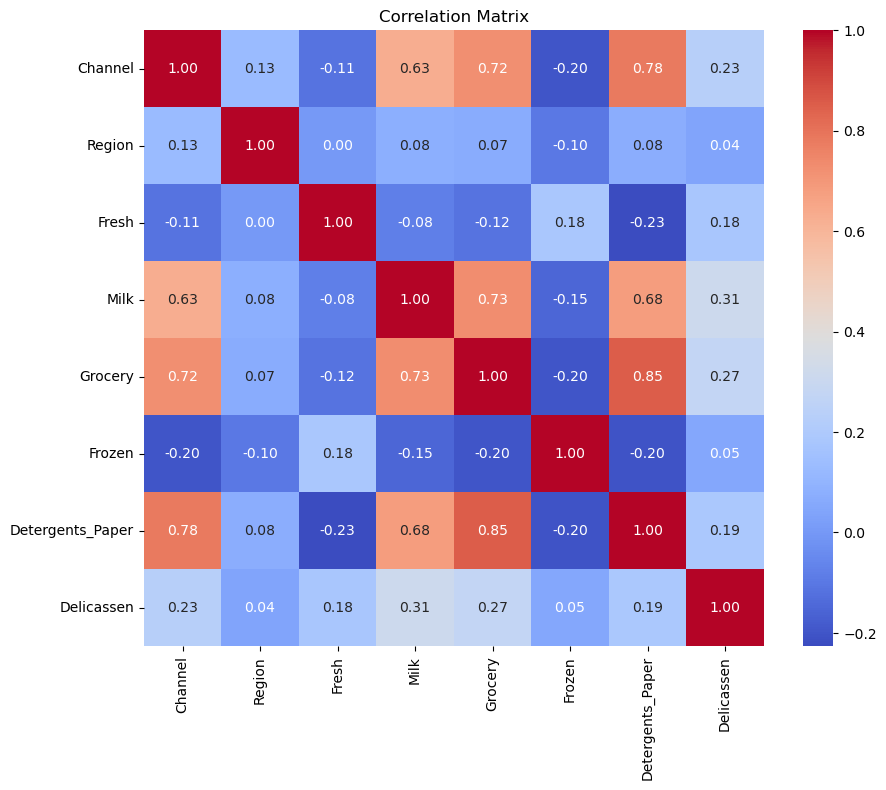

Highly correlated pairs:
                    Channel      Milk   Grocery  Detergents_Paper
Channel                NaN       NaN  0.722198          0.784068
Milk                   NaN       NaN  0.727206               NaN
Grocery           0.722198  0.727206       NaN          0.854322
Detergents_Paper  0.784068       NaN  0.854322               NaN


In [7]:
# Check for highly correlated features
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

high_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix < 1.0)]
print("Highly correlated pairs:\n", high_corr.dropna(how='all').dropna(axis=1, how='all'))

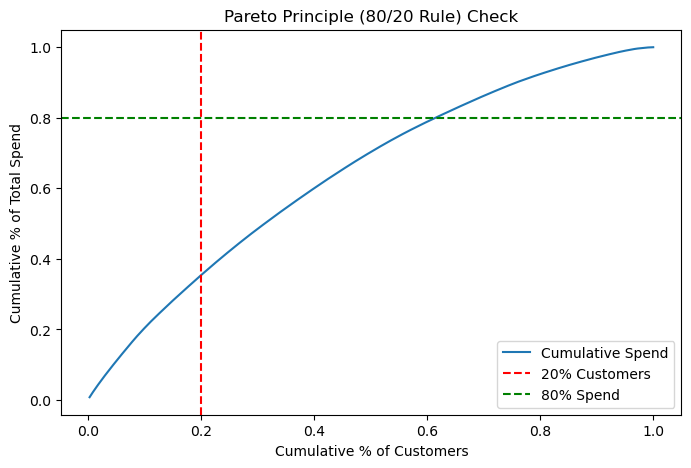

Percentage of customers accounting for 80% of spend: 61.75%


In [8]:
# Check if the dataset displays Pareto's principle
spending_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df['Total_Spend'] = df[spending_cols].sum(axis=1)

df_sorted = df.sort_values('Total_Spend', ascending=False)

df_sorted['cum_customers'] = np.arange(1, len(df_sorted)+1) / len(df_sorted)
df_sorted['cum_spend'] = df_sorted['Total_Spend'].cumsum() / df_sorted['Total_Spend'].sum()

plt.figure(figsize=(8,5))
plt.plot(df_sorted['cum_customers'], df_sorted['cum_spend'], label='Cumulative Spend')
plt.axvline(0.2, color='red', linestyle='--', label='20% Customers')
plt.axhline(0.8, color='green', linestyle='--', label='80% Spend')
plt.xlabel('Cumulative % of Customers')
plt.ylabel('Cumulative % of Total Spend')
plt.title('Pareto Principle (80/20 Rule) Check')
plt.legend()
plt.show()

pareto_cutoff = df_sorted[df_sorted['cum_spend'] >= 0.8]['cum_customers'].iloc[0]
print(f"Percentage of customers accounting for 80% of spend: {pareto_cutoff:.2%}")

**Your observations here**

- Channel & Grocery have a high correlation pair (as seen in the correlation matrix)
- There are no missing values in the dataset.
- Outliers were present and have been removed using the IQR method, reducing the dataset size.
- The value ranges for features are very different (e.g., Fresh vs. Delicassen), indicating the need for feature scaling.
- The data distribution is skewed for several columns, with some customers spending much more than others.
- The Pareto principle is observed: a small percentage of customers account for a large percentage of total spend (close to the 80/20 rule).
- Some features (like Detergents_Paper and Grocery) are highly collinear, which may affect clustering results.
- Categorical columns (Channel, Region) have been converted to numeric codes for analysis.



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [9]:
if 'Channel' in df.columns and not np.issubdtype(df['Channel'].dtype, np.number):
    df['Channel'] = df['Channel'].astype('category').cat.codes
if 'Region' in df.columns and not np.issubdtype(df['Region'].dtype, np.number):
    df['Region'] = df['Region'].astype('category').cat.codes

df = df.drop_duplicates()

df = df.reset_index(drop=True)

if 'Total_Spend' in df.columns:
    df = df.drop(columns=['Total_Spend'])

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,1,3,13265,1196,4221,6404,507,1788
3,2,3,9413,8259,5126,666,1795,1451
4,2,3,12126,3199,6975,480,3140,545


**Your comment here**

- The data needed cleaning and transformation.
- Outliers were present and have been removed using the IQR method, which helps improve clustering results.
- The value ranges for features are very different (e.g., Fresh vs. Delicassen), so feature scaling (such as StandardScaler) is necessary before clustering.
- There are no missing values, so no imputation is needed.
- Categorical columns (Channel, Region) should be converted to numeric codes if not already done.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [10]:
from sklearn.preprocessing import StandardScaler
features = df.columns
scaler = StandardScaler()
customers_scale = scaler.fit_transform(df[features])
print(customers_scale)

[[ 1.5794736   0.59009178  0.38304079 ... -0.96700429  0.30505322
   0.3904653 ]
 [ 1.5794736   0.59009178 -0.30558788 ... -0.05925481  0.56913935
   0.92259064]
 [-0.63312233  0.59009178  0.45617384 ...  2.66282084 -0.61946154
   0.93716941]
 ...
 [-0.63312233  0.59009178  0.88147444 ... -0.68904999  0.17578328
  -0.21698372]
 [-0.63312233  0.59009178  0.09112211 ... -0.48380948 -0.76409029
   1.34659005]
 [-0.63312233  0.59009178 -0.82954447 ... -1.05437811 -0.63226055
  -1.17189357]]


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(customers_scale)
df['labels'] = kmeans.labels_
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,1,3,13265,1196,4221,6404,507,1788,1
3,2,3,9413,8259,5126,666,1795,1451,0
4,2,3,12126,3199,6975,480,3140,545,0


### Looking to the elbow we can choose 2 like the correct number of clusters

In [12]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)
labels = kmeans_2.predict(customers_scale)
clusters = kmeans_2.labels_.tolist()

In [13]:
df['Labels'] = clusters

Count the values in `labels`.

In [14]:
df['labels'].value_counts()

labels
1    233
0     99
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [15]:
from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(eps=0.5)
dbscan.fit(customers_scale)
df['labels_DBSCAN'] = dbscan.labels_
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,Labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,0,1,-1
1,2,3,7057,9810,9568,1762,3293,1776,0,1,-1
2,1,3,13265,1196,4221,6404,507,1788,1,0,-1
3,2,3,9413,8259,5126,666,1795,1451,0,1,-1
4,2,3,12126,3199,6975,480,3140,545,0,1,-1


Count the values in `labels_DBSCAN`.

In [16]:
df['labels_DBSCAN'].value_counts()


labels_DBSCAN
-1    308
 0     24
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [17]:
def plot(x,y,hue,title="Detergents Paper vs Milk"):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title(title)
    return plt.show();

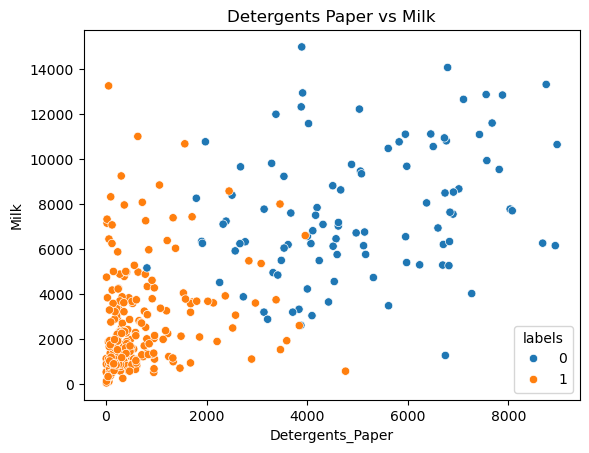

In [18]:
plot(df['Detergents_Paper'], df['Milk'], df['labels'])

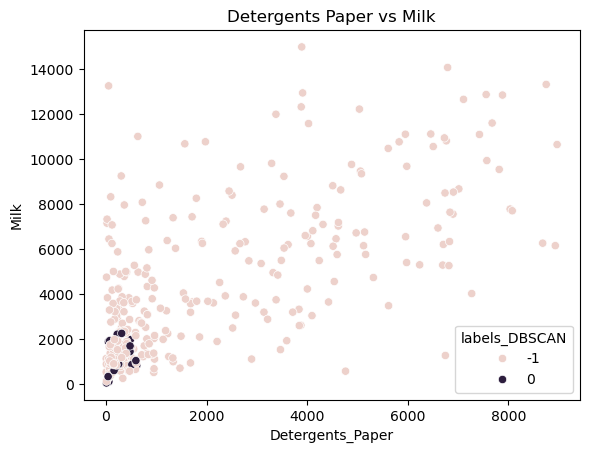

In [19]:
plot(df['Detergents_Paper'], df['Milk'], df['labels_DBSCAN'])

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

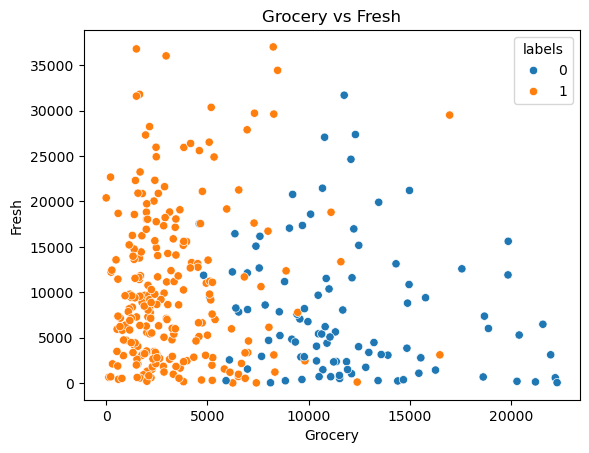

In [20]:
plot(df['Grocery'], df['Fresh'], df['labels'], "Grocery vs Fresh")

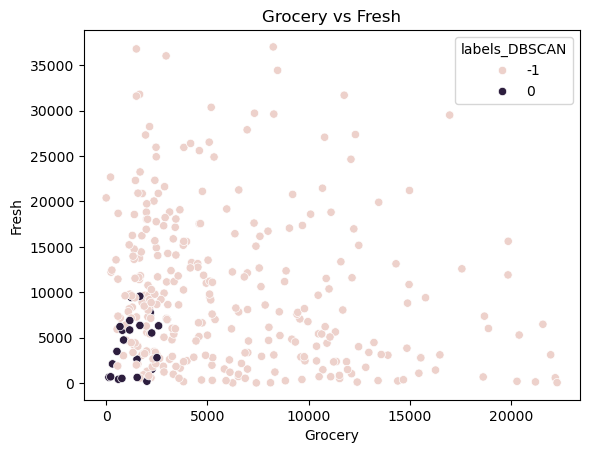

In [21]:
plot(df['Grocery'], df['Fresh'], df['labels_DBSCAN'], "Grocery vs Fresh")

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

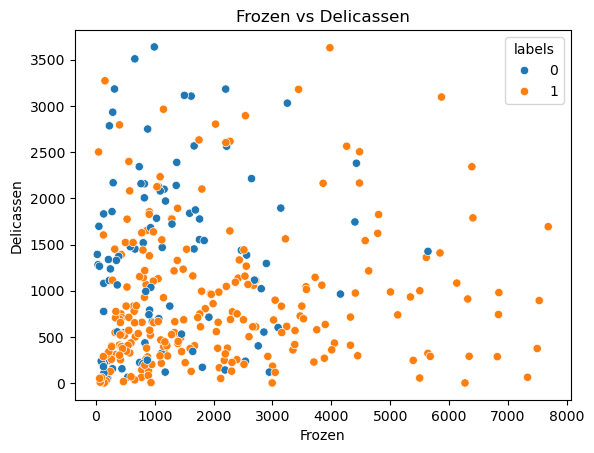

In [22]:
plot(df['Frozen'], df['Delicassen'], df['labels'], "Frozen vs Delicassen")

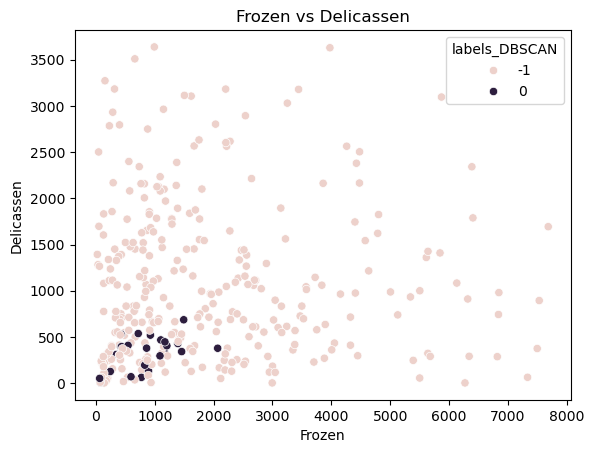

In [23]:
plot(df['Frozen'], df['Delicassen'], df['labels_DBSCAN'], "Frozen vs Delicassen")

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [27]:
kmeans_means = df.groupby('labels').mean(numeric_only=True)
print("Means by K-Means clusters:")
print(kmeans_means)

dbscan_means = df.groupby('labels_DBSCAN').mean(numeric_only=True)
print("\nMeans by DBSCAN clusters:")
print(dbscan_means)

Means by K-Means clusters:
         Channel    Region         Fresh         Milk       Grocery  \
labels                                                                
0       1.919192  2.676768   7728.989899  7656.606061  11876.454545   
1       1.017167  2.480687  10320.025751  2596.206009   3325.901288   

             Frozen  Detergents_Paper   Delicassen    Labels  labels_DBSCAN  
labels                                                                       
0       1256.363636       5015.545455  1339.767677  1.000000      -1.000000  
1       2120.824034        660.261803   879.291845  0.008584      -0.896996  

Means by DBSCAN clusters:
                Channel    Region        Fresh         Milk      Grocery  \
labels_DBSCAN                                                              
-1             1.308442  2.503247  9952.808442  4337.454545  6223.438312   
 0             1.000000  3.000000  4344.625000  1124.333333  1411.875000   

                    Frozen  Detergents_Paper

Which algorithm appears to perform better?

**Your observations here**

- K-Means generally produces more balanced and well-separated clusters, as seen in the scatter plots and the group means. It assigns all points to a cluster, which is useful for this dataset.
- DBSCAN often labels many points as noise (-1), especially if the data is not well-suited for density-based clustering or if the parameters are not optimal. This can result in fewer meaningful clusters and many outliers.
- In this case, K-Means appears to perform better because it creates clearer, more interpretable groupings, while DBSCAN may leave too many points unclustered.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

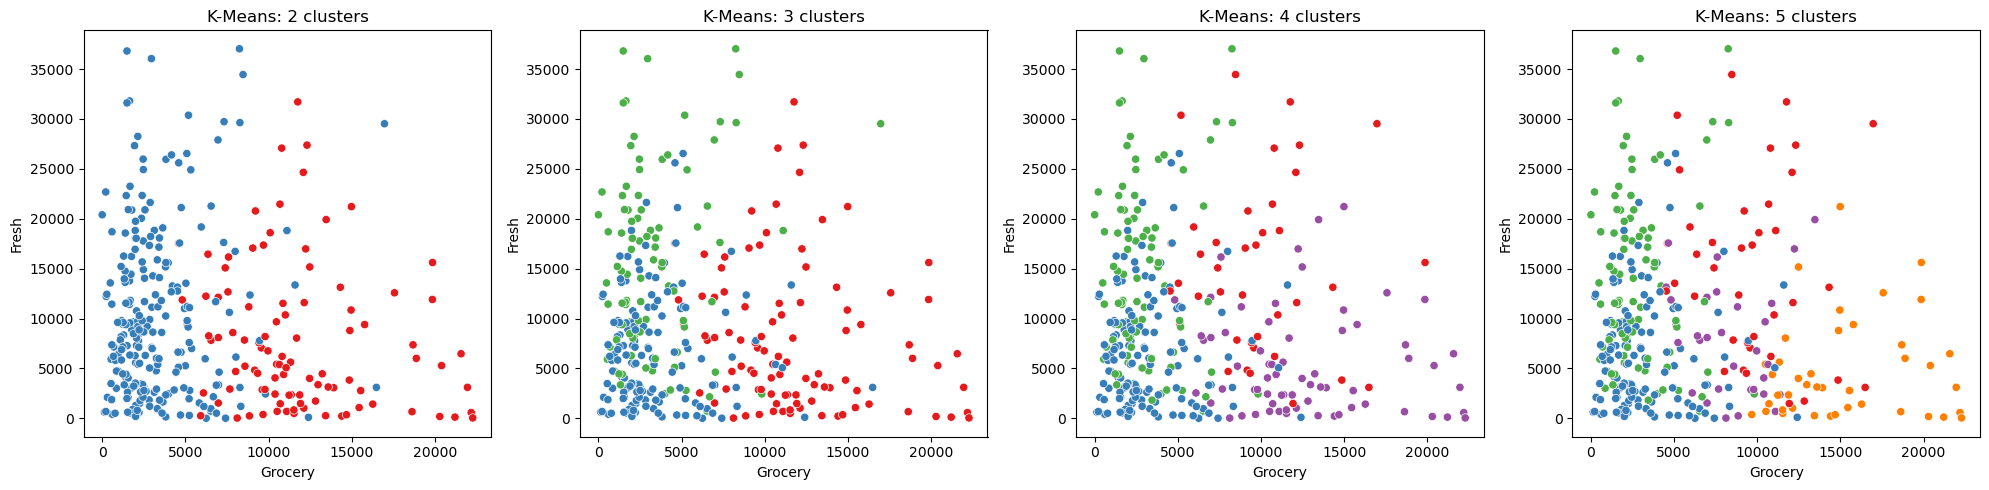

In [28]:
cluster_range = [2, 3, 4, 5]
fig, axes = plt.subplots(1, len(cluster_range), figsize=(20, 5))

for i, n_clusters in enumerate(cluster_range):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(customers_scale)
    labels = kmeans.labels_
    sns.scatterplot(
        x=df['Grocery'], y=df['Fresh'],
        hue=labels, palette='Set1', ax=axes[i], legend=None
    )
    axes[i].set_title(f'K-Means: {n_clusters} clusters')
    axes[i].set_xlabel('Grocery')
    axes[i].set_ylabel('Fresh')

plt.tight_layout()
plt.show()

**Your comment here**

- As we increase the number of clusters in K-Means from 2 to 5, we see that the data points are split into more groups, but the separation between clusters may become less meaningful.
- With 2 clusters, the separation is clear and interpretable, matching the main structure of the data.
- With 3 or more clusters, some clusters may become too small or overlap, indicating that additional clusters do not necessarily provide more insight.
- The optimal number of clusters appears to be 2 for this dataset, as it provides the clearest and most interpretable separation.
- This visual approach helps us see that adding more clusters can lead to overfitting or less meaningful groupings.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

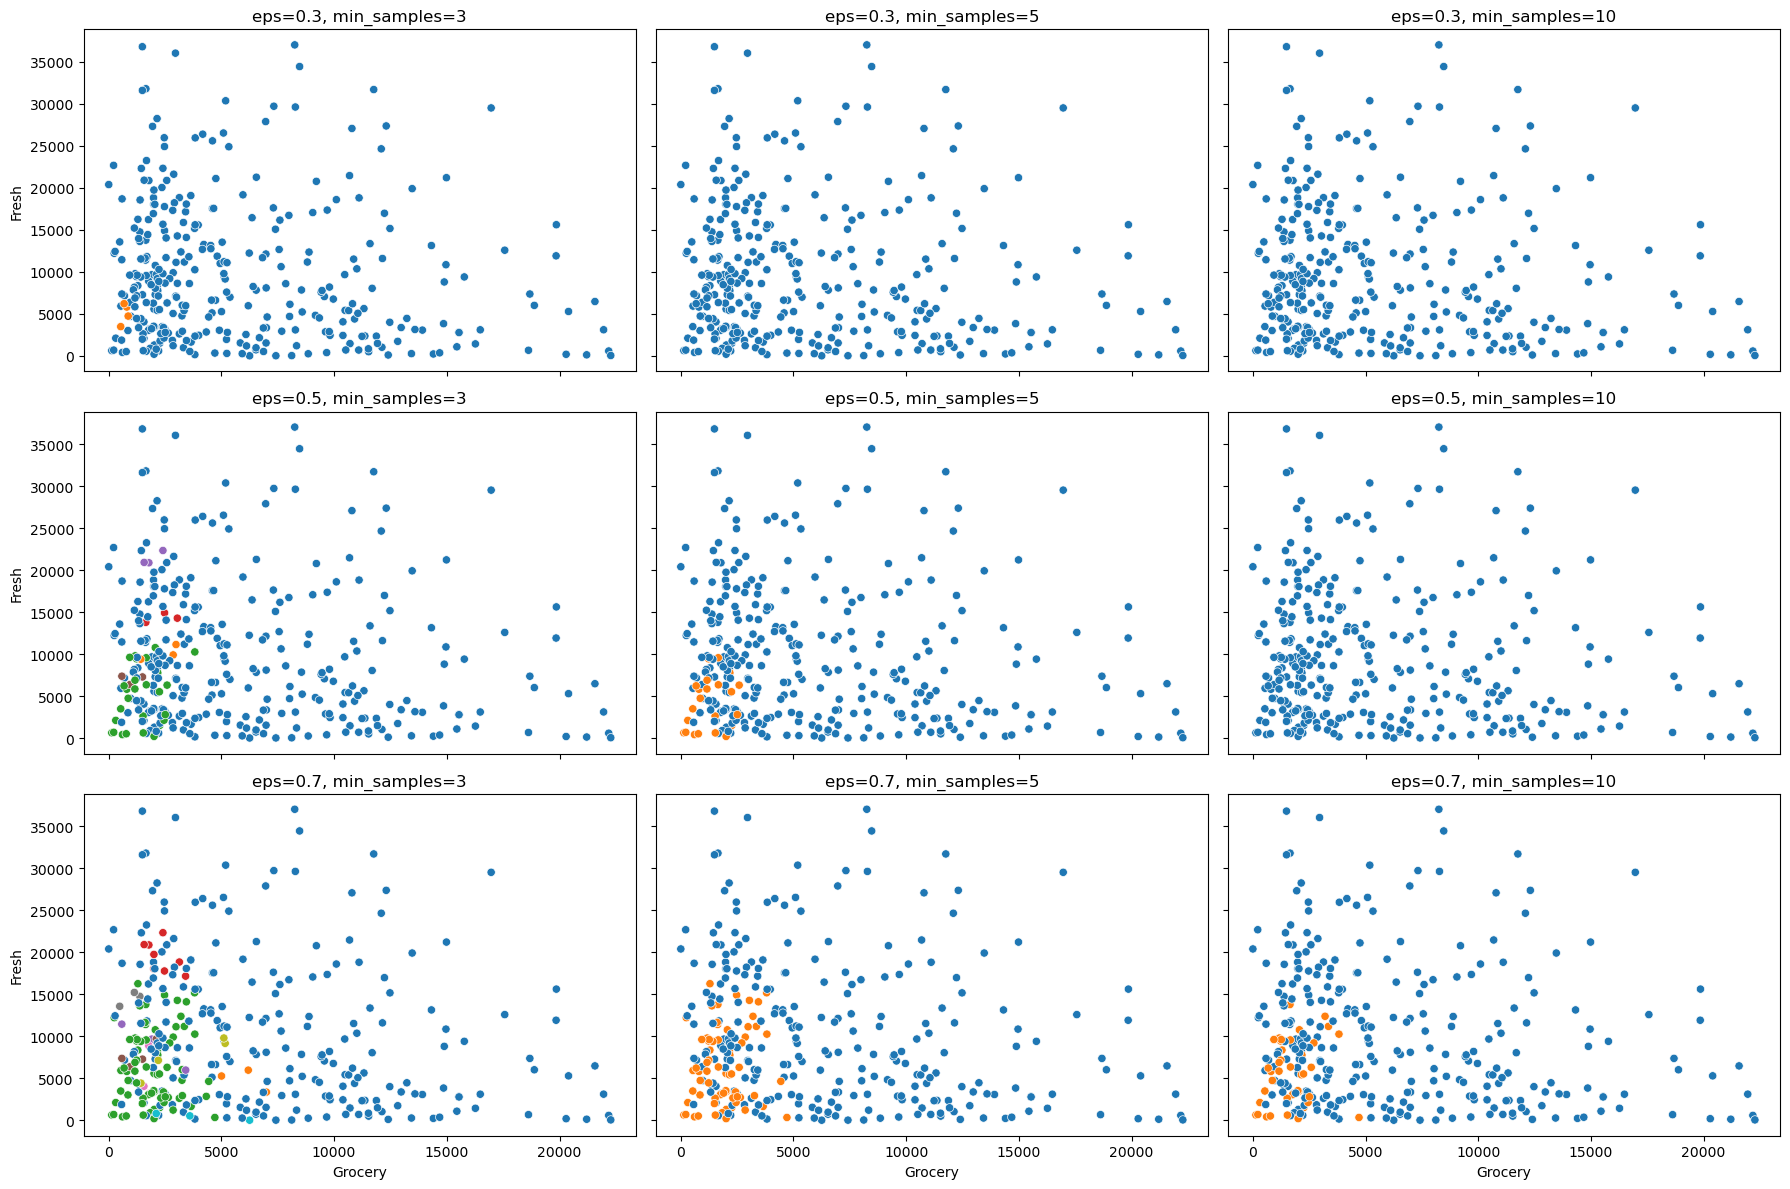

In [29]:
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 10]

fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(18, 12), sharex=True, sharey=True)

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(customers_scale)
        sns.scatterplot(
            x=df['Grocery'], y=df['Fresh'],
            hue=labels, palette='tab10', ax=axes[i, j], legend=None
        )
        axes[i, j].set_title(f'eps={eps}, min_samples={min_samples}')
        axes[i, j].set_xlabel('Grocery')
        axes[i, j].set_ylabel('Fresh')

plt.tight_layout()
plt.show()

**Your comment here**

- Changing the `eps` and `min_samples` parameters in DBSCAN significantly affects the clustering results.
- Lower `eps` values (e.g., 0.3) make the algorithm stricter, resulting in more points labeled as noise (-1) and fewer clusters.
- Higher `eps` values (e.g., 0.7) allow more points to be grouped together, often resulting in fewer noise points but sometimes merging distinct clusters.
- Increasing `min_samples` makes it harder for points to form a cluster, so more points may be labeled as noise, especially with small `eps`.
- The best clustering is a balance: too strict parameters lead to many noise points, while too loose parameters may merge distinct groups.
- Visual inspection helps to choose parameters that reveal meaningful clusters without excessive noise or over-merging.